In [ ]:
import os
import random
import torch
from ultralytics import YOLO

TRAIN = 0
MODEL_PATH = "yolo11n.pt" if TRAIN else "best.pt"
DATA_PATH = "robocup-od-dataset/data.yaml" # path to dataset, not available in this repo (a bit too large)

EPOCHS = 10
BATCH_SIZE = 32
IMAGE_SIZE = 512

In [5]:
model = YOLO(MODEL_PATH)

# Train the model
if TRAIN:
    results = model.train(
        data=DATA_PATH,
        epochs=EPOCHS,
        batch=BATCH_SIZE,
        imgsz=IMAGE_SIZE,
        device='cuda'
    )

100%|██████████| 5.35M/5.35M [00:00<00:00, 76.1MB/s]


Ultralytics 8.3.84 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/input/robocup-od-dataset/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=512, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/robocup-od-dataset/train/labels... 6384 images, 606 backgrounds, 0 corrupt: 100%|██████████| 6384/6384 [00:21<00:00, 294.08it/s]

train: WARNING ⚠️ /kaggle/input/robocup-od-dataset/train/images/00989_jpg.rf.e12f295ad20cd23e23899a2b1f3b8022.jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/robocup-od-dataset/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 754, len(boxes) = 10095. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/robocup-od-dataset/valid/labels... 749 images, 119 backgrounds, 0 corrupt: 100%|██████████| 749/749 [00:02<00:00, 281.52it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/robocup-od-dataset/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 136, len(boxes) = 937. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.04G      1.099      1.759      1.287         19        512: 100%|██████████| 200/200 [01:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]


                   all        749        937      0.849      0.726      0.835       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.12G      1.187      1.134      1.342         24        512: 100%|██████████| 200/200 [00:57<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.87it/s]


                   all        749        937      0.821      0.676      0.767       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.05G      1.159     0.9317      1.329         20        512: 100%|██████████| 200/200 [00:54<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        749        937      0.842      0.303      0.329      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.05G      1.146     0.8785      1.319         69        512: 100%|██████████| 200/200 [00:55<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.83it/s]

                   all        749        937      0.871        0.8      0.879      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.05G      1.061     0.7801       1.26         25        512: 100%|██████████| 200/200 [00:55<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.93it/s]


                   all        749        937      0.939       0.89      0.949      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.05G      1.027     0.7285      1.239         40        512: 100%|██████████| 200/200 [00:55<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.75it/s]

                   all        749        937      0.945      0.893      0.955       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       3.1G     0.9821     0.6655      1.207         29        512: 100%|██████████| 200/200 [00:54<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.90it/s]

                   all        749        937      0.958      0.911      0.968      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       3.1G     0.9308     0.6152      1.173         26        512: 100%|██████████| 200/200 [00:54<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.91it/s]

                   all        749        937      0.961      0.917      0.972      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.07G     0.8859     0.5818      1.149         27        512: 100%|██████████| 200/200 [00:54<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.75it/s]

                   all        749        937      0.971      0.926      0.974      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       3.1G     0.8481     0.5411      1.124         28        512: 100%|██████████| 200/200 [00:54<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.88it/s]

                   all        749        937      0.965       0.94      0.978      0.823



10 epochs completed in 0.171 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.84 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.09it/s]


                   all        749        937      0.965       0.94      0.978      0.823
     fire_extinguisher        494        801      0.958      0.903      0.964      0.796
             baby_face        136        136      0.972      0.978      0.992       0.85


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train


In [6]:
if TRAIN:
    for k,v in results.results_dict.items():
        print(f'{k}: {v}')

metrics/precision(B): 0.9647941413156472
metrics/recall(B): 0.940281449658515
metrics/mAP50(B): 0.9780607358520474
metrics/mAP50-95(B): 0.8229824522310633
fitness: 0.8384902805931617


In [7]:
if TRAIN:
    results = model.val(
        data=DATA_PATH,
        epochs=EPOCHS,
        batch=BATCH_SIZE,
        imgsz=IMAGE_SIZE,
        device='cuda'
    )

Ultralytics 8.3.84 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /kaggle/input/robocup-od-dataset/valid/labels... 749 images, 119 backgrounds, 0 corrupt: 100%|██████████| 749/749 [00:00<00:00, 764.78it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/robocup-od-dataset/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 136, len(boxes) = 937. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.49it/s]


                   all        749        937      0.965       0.94      0.978      0.823
     fire_extinguisher        494        801      0.958      0.902      0.964      0.796
             baby_face        136        136      0.972      0.978      0.992       0.85


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.5ms preprocess, 3.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2



image 1/1 /kaggle/input/robocup-od-dataset/test/images/135_jpg.rf.03825c05b9fbc87ddc801cbf935c1611.jpg: 512x512 1 fire_extinguisher, 11.5ms
Speed: 2.4ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)


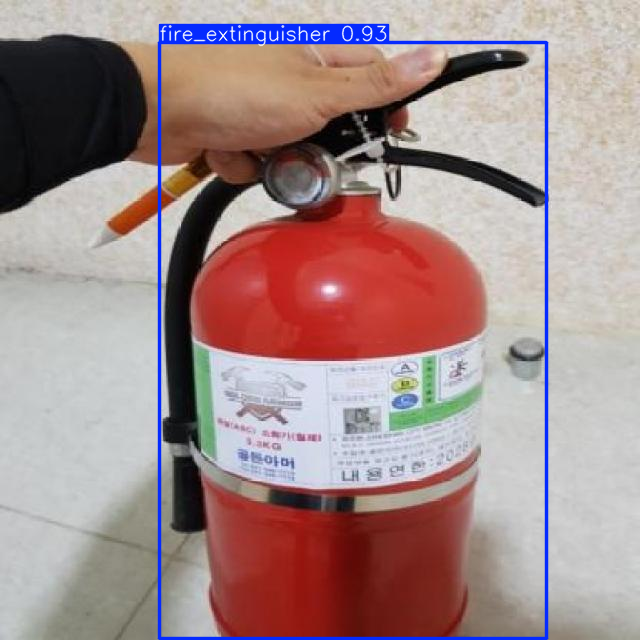


image 1/1 /kaggle/input/robocup-od-dataset/test/images/4080_png.rf.530653a50db0f669558357e69f14850b.jpg: 512x512 (no detections), 10.6ms
Speed: 2.9ms preprocess, 10.6ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)


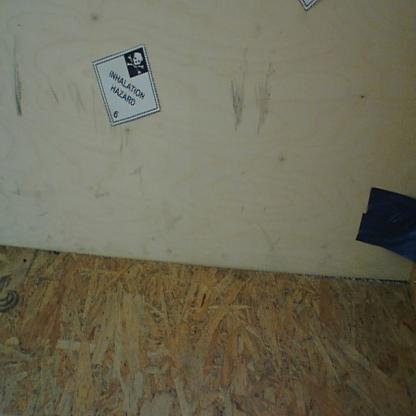


image 1/1 /kaggle/input/robocup-od-dataset/test/images/3132_png.rf.899223ec7aec061b6fcd8b2de08812eb.jpg: 512x512 1 baby_face, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)


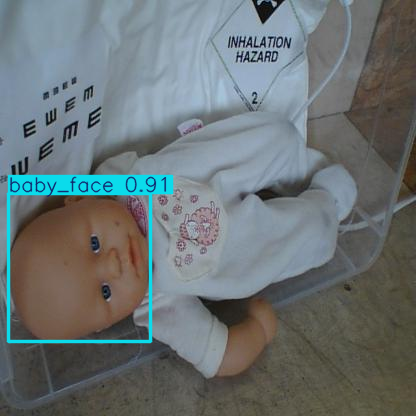


image 1/1 /kaggle/input/robocup-od-dataset/test/images/4151_png.rf.b85fdfabfddf3b0acaca1ed30fb9ee64.jpg: 512x512 (no detections), 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)


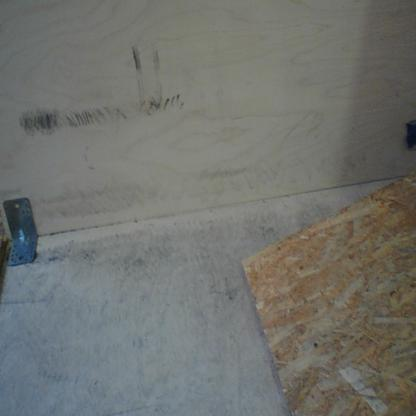


image 1/1 /kaggle/input/robocup-od-dataset/test/images/5_jpg.rf.f45a71cb0e7486658dbb1c719e230263.jpg: 512x512 1 fire_extinguisher, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 512)


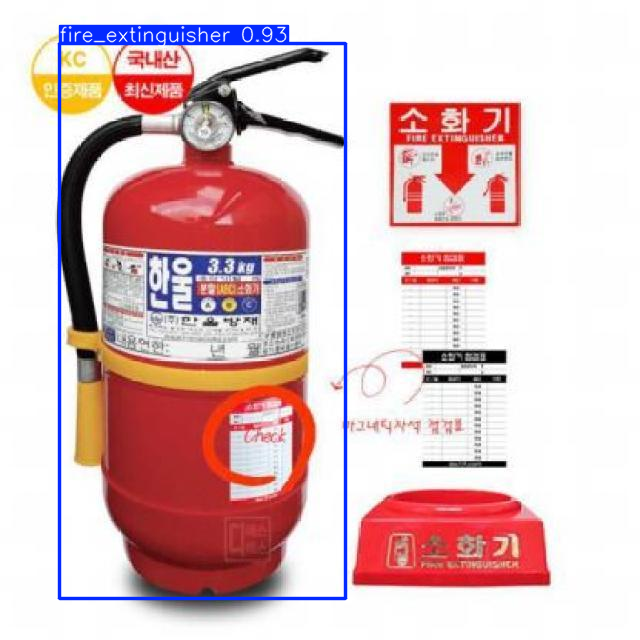


image 1/1 /kaggle/input/robocup-od-dataset/test/images/3322_png.rf.feba1e4bb9eba42a8e1f2a0fc61dd697.jpg: 512x512 1 baby_face, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)


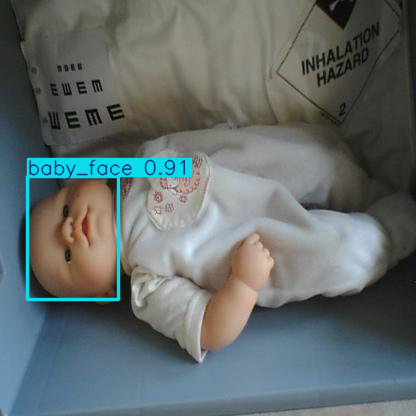


image 1/1 /kaggle/input/robocup-od-dataset/test/images/0001_jpg.rf.6c5ce1a38701528197509b823a663f46.jpg: 512x512 1 fire_extinguisher, 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 512)


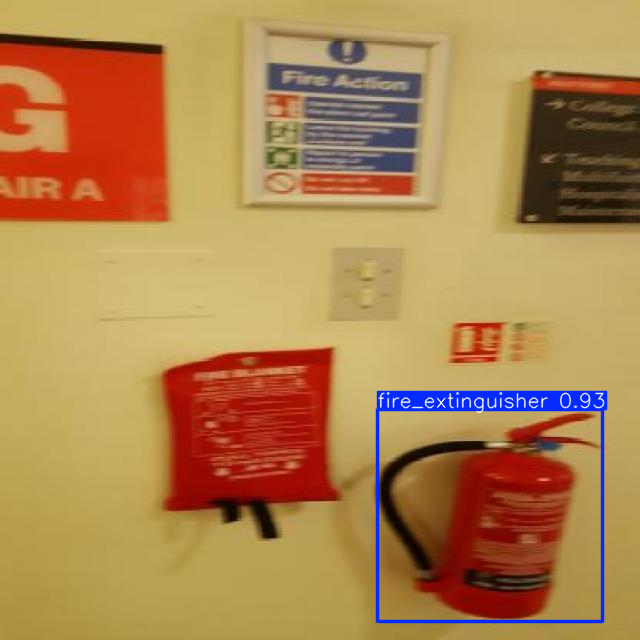


image 1/1 /kaggle/input/robocup-od-dataset/test/images/3239_png.rf.4814b3688a5913e826fd302b1d2ee582.jpg: 512x512 1 baby_face, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)


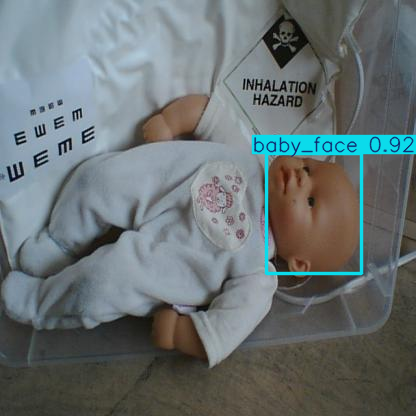


image 1/1 /kaggle/input/robocup-od-dataset/test/images/129_jpg.rf.2d681c981f0438e0232bea45aa81808f.jpg: 512x512 2 fire_extinguishers, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)


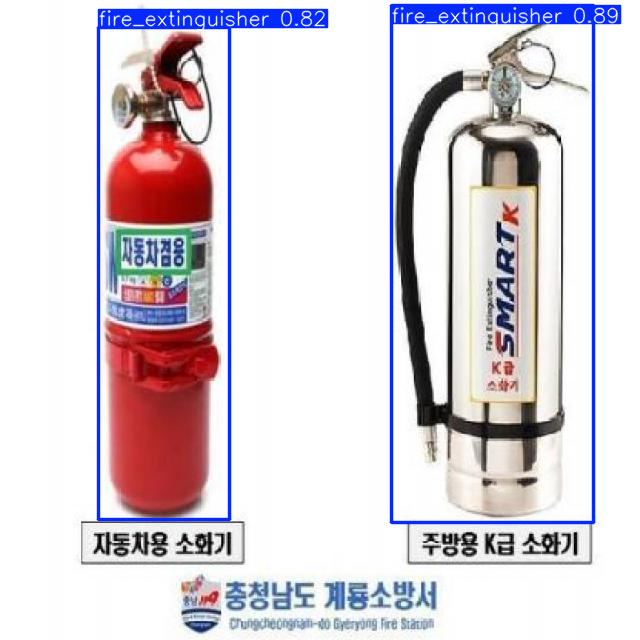


image 1/1 /kaggle/input/robocup-od-dataset/test/images/666_png.rf.f33bee576bf2284a198e7bef1dd51322.jpg: 512x512 1 baby_face, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)


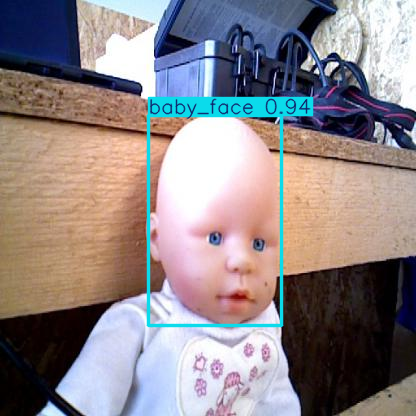

In [ ]:
dirname = "robocup-od-dataset/test/images"
filenames = os.listdir(dirname)
random.shuffle(filenames)

for filename in filenames[:10]:
    path = os.path.join(dirname, filename)
    results = model.predict(path)
    for result in results:
        result.show()